# Assignment 1

In this assignment, you will be analyzing Uber pickup data. You have been given several features defined and labeled by Uber using historical data and you will create a model that will predict whether or not a rider is happy about the pickup experience or not. Uber would like to know whether the features they have determined allow for a good ML model performance. 

This data set contains the following features:

* **id**: trip id assigned by Uber
* **driver_id**: id number of the driver assigned by Uber
* **uber_type**: type of the uber ride requested (Uber Black, UberX, UberPool)
* **rider_type**: type of the rider determined/labeled in-house by Uber (Premium, Commuter, HFR - High Frequency Rider, Social, Traveler, Other)
* **rendezvous_confidence**: confidence score of the rendezvous location determined based on historical trips
* **driver_distance**: the distance of the driver (in feet) to the rendezvous location when "ride has arrived" signal is sent to the rider determined based on GPS location
* **rider_distance**: the distance of the rider (in feet) to the rendezvous location when "ride has arrived" signal is sent to the rider
* **ata_vs_eta**: the time difference (in minutes) between the actual time of arrival (ATA) and the estimated time of arrival (eta)
* **happiness**: 0 or 1 indicating whether the rider is happy about the pickup experience or not (derived from ratings)

**Note**: rider_distance has missing values. You are instructed not to drop any rows with missing values, instead you will need to impute them based on another feature.




## Library and Data Import

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Load the dataset
uber = pd.read_csv("Uber_pickup.csv")

In [6]:
uber.head()

,id,driver_id,uber_type,rider_type,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,happiness
0,ID86355,NM0GE9E70F1043201,Uber Black,Traveler,5.304,29.67,3.7,0.9,1
1,ID86355,WBALZ5C56CD701241,Uber Black,Traveler,5.304,30.67,3.7,1.0,1
2,ID868202,1FTEW1E87AK806915,UberPool,HFR,3.622,22.47,10.8,1.1,1
3,ID927241,SALVN2BG6DH555886,UberPool,Traveler,4.712,29.33,5.0,1.1,1
4,ID927241,YV4902BZ0E1579049,UberPool,Traveler,4.712,29.33,5.0,1.1,1


In [26]:
uber.info()
#uber[['uber_type', 'rider_type', 'happiness']].apply(lambda x: x.astype('category'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 9 columns):
id                       1138 non-null object
driver_id                1138 non-null object
uber_type                1138 non-null object
rider_type               1138 non-null object
rendezvous_confidence    1138 non-null float64
rider_distance           1032 non-null float64
driver_distance          1138 non-null float64
ata_vs_eta               1138 non-null float64
happiness                1138 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 80.1+ KB


,uber_type,rider_type,happiness
0,Uber Black,Traveler,1
1,Uber Black,Traveler,1
2,UberPool,HFR,1
3,UberPool,Traveler,1
4,UberPool,Traveler,1
5,UberPool,HFR,1
6,UberX,HFR,1
7,UberPool,Traveler,1
8,UberPool,Traveler,1
9,UberPool,HFR,1


In [27]:
uber.describe()

,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,happiness
count,1138.000000,1032.000000,1138.000000,1138.000000,1138.000000
mean,3.854411,25.039738,9.801933,6.401933,0.405975
std,0.562318,13.035700,2.430518,3.525344,0.491296
min,2.105200,5.710000,0.100000,0.900000,0.000000
25%,3.454800,13.452500,8.600000,2.400000,0.000000
50%,3.834800,20.880000,10.400000,6.100000,0.000000
75%,4.212000,37.752500,11.500000,9.600000,1.000000
max,6.536000,53.810000,14.600000,14.800000,1.000000


In [9]:
# Take a look at the column names
uber.columns

Index(['id', 'driver_id', 'uber_type', 'rider_type', 'rendezvous_confidence',
       'rider_distance', 'driver_distance', 'ata_vs_eta', 'happiness'],
      dtype='object')

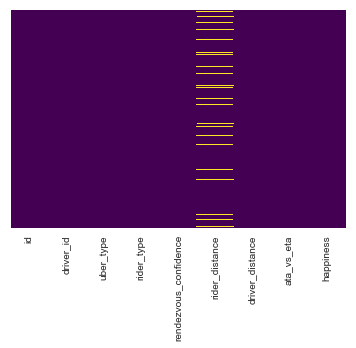

In [74]:
sns.heatmap(uber.isnull(),yticklabels=False,cbar=False,cmap="viridis")

## Exploratory Data Analysis through Visualizations


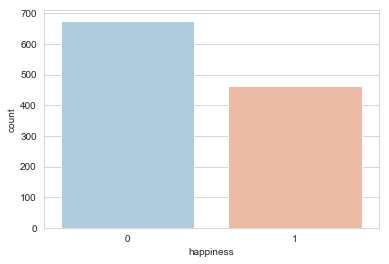

In [75]:
# Distribution of happiness
sns.set_style("whitegrid")
sns.countplot(x='happiness',data=uber,palette='RdBu_r')

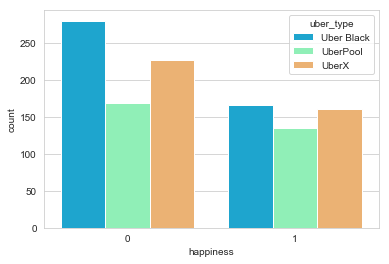

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='happiness',hue='uber_type',data=uber,palette='rainbow')

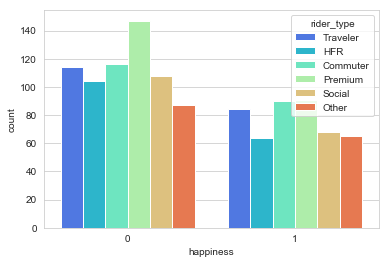

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='happiness',hue='rider_type',data=uber,palette='rainbow')

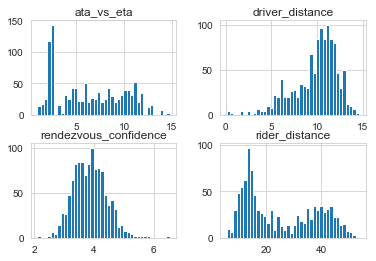

In [78]:
viz = uber[['rendezvous_confidence', 'rider_distance', 'driver_distance', 'ata_vs_eta']]
viz.hist(bins = 40)
plt.show()

## Data Cleaning

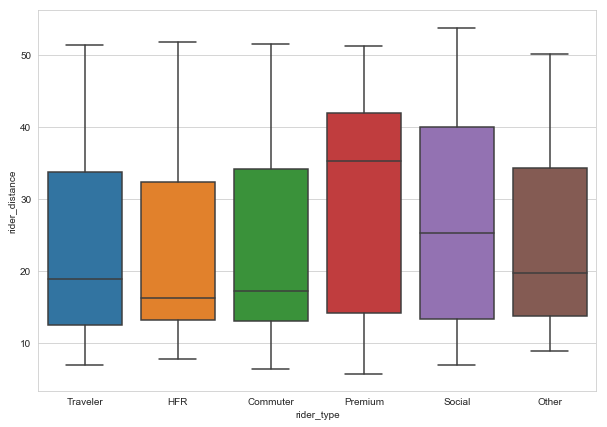

In [79]:
plt.figure(figsize=(10,7))
sns.boxplot(x="rider_type",y="rider_distance",data=uber)

In [80]:
uber.groupby("rider_type")["rider_distance"].mean()

rider_type
Commuter    22.528593
HFR         22.197933
Other       23.864681
Premium     30.213270
Social      27.334621
Traveler    23.251022
Name: rider_distance, dtype: float64

In [81]:
def impute_distance(cols):
    rider_distance = cols[0]
    rider_type = cols[1]
    
    if pd.isnull(rider_distance):
        
        if rider_type == 'Commuter':
            return 22.5
        elif rider_type == 'HFR':
            return 22.2
        elif rider_type == 'Other':
            return 23.9
        elif rider_type == 'Premium':
            return 30.2
        elif rider_type == 'Social':
            return 27.3
        else:
            return 23.3
    else:
        return rider_distance

In [82]:
uber["rider_distance"] = uber[["rider_distance","rider_type"]].apply(impute_distance,axis=1)

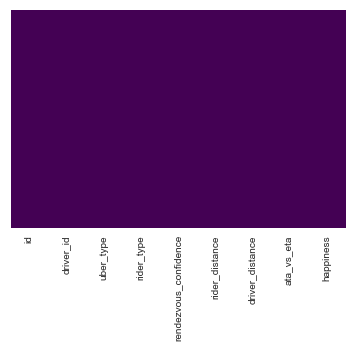

In [83]:
sns.heatmap(uber.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [84]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 9 columns):
id                       1138 non-null object
driver_id                1138 non-null object
uber_type                1138 non-null object
rider_type               1138 non-null object
rendezvous_confidence    1138 non-null float64
rider_distance           1138 non-null float64
driver_distance          1138 non-null float64
ata_vs_eta               1138 non-null float64
happiness                1138 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 80.1+ KB


In [85]:
uber_type = pd.get_dummies(uber["uber_type"], drop_first=False)
rider_type = pd.get_dummies(uber["rider_type"],drop_first=False)

In [87]:
uber_type.head()
rider_type.head()

,Commuter,HFR,Other,Premium,Social,Traveler
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [88]:
uber = pd.concat([uber,uber_type,rider_type],axis=1)
uber.head()

,id,driver_id,uber_type,rider_type,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,happiness,Uber Black,UberPool,UberX,Commuter,HFR,Other,Premium,Social,Traveler
0,ID86355,NM0GE9E70F1043201,Uber Black,Traveler,5.304,29.67,3.7,0.9,1,1,0,0,0,0,0,0,0,1
1,ID86355,WBALZ5C56CD701241,Uber Black,Traveler,5.304,30.67,3.7,1.0,1,1,0,0,0,0,0,0,0,1
2,ID868202,1FTEW1E87AK806915,UberPool,HFR,3.622,22.47,10.8,1.1,1,0,1,0,0,1,0,0,0,0
3,ID927241,SALVN2BG6DH555886,UberPool,Traveler,4.712,29.33,5.0,1.1,1,0,1,0,0,0,0,0,0,1
4,ID927241,YV4902BZ0E1579049,UberPool,Traveler,4.712,29.33,5.0,1.1,1,0,1,0,0,0,0,0,0,1


In [89]:
uber.drop(["uber_type","rider_type","id","driver_id"],axis=1,inplace=True)

In [90]:
uber.head(10)

,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,happiness,Uber Black,UberPool,UberX,Commuter,HFR,Other,Premium,Social,Traveler
0,5.304,29.67,3.7,0.9,1,1,0,0,0,0,0,0,0,1
1,5.304,30.67,3.7,1.0,1,1,0,0,0,0,0,0,0,1
2,3.622,22.47,10.8,1.1,1,0,1,0,0,1,0,0,0,0
3,4.712,29.33,5.0,1.1,1,0,1,0,0,0,0,0,0,1
4,4.712,29.33,5.0,1.1,1,0,1,0,0,0,0,0,0,1
5,3.622,22.47,10.8,1.2,1,0,1,0,0,1,0,0,0,0
6,4.152,11.73,9.6,1.2,1,0,0,1,0,1,0,0,0,0
7,4.436,18.70,11.2,1.2,1,0,1,0,0,0,0,0,0,1
8,4.436,18.70,11.2,1.2,1,0,1,0,0,0,0,0,0,1
9,4.568,22.20,0.1,1.2,1,0,1,0,0,1,0,0,0,0


## Building the Model

In [91]:
X = uber.drop("happiness",axis=1)
y = uber["happiness"]

In [92]:
X.head()

,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,Uber Black,UberPool,UberX,Commuter,HFR,Other,Premium,Social,Traveler
0,5.304,29.67,3.7,0.9,1,0,0,0,0,0,0,0,1
1,5.304,30.67,3.7,1.0,1,0,0,0,0,0,0,0,1
2,3.622,22.47,10.8,1.1,0,1,0,0,1,0,0,0,0
3,4.712,29.33,5.0,1.1,0,1,0,0,0,0,0,0,1
4,4.712,29.33,5.0,1.1,0,1,0,0,0,0,0,0,1


In [94]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: happiness, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\student\Documents\Spring 2019\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
predictions=logreg.predict(X_test)

## Predictions and Evaluations

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       133
           1       0.94      0.82      0.88        95

   micro avg       0.90      0.90      0.90       228
   macro avg       0.91      0.89      0.90       228
weighted avg       0.91      0.90      0.90       228



In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
confusion_matrix(y_test,predictions)

array([[128,   5],
       [ 17,  78]], dtype=int64)

>The accuracy of perdiction is 90%. The prediction is ok. However, I think the class imbalance of happiness might affect the model. Also, If we know the gender of drivers and riders, this might have interesting results. In this model, I found that people called UberX, and peopl under the class of premium does not seems having a good time on the vehicle. This confuses me, since both of the categories provide luxuary services and better vehicle, what could be the reason that they are being unsatisfied? Could it be the high price? People paid a lot but they did not receive the high quality services? I think Uber should also add the final price as a feature.